<a href="https://colab.research.google.com/github/dwiahmaddzul/MSIBProject20231/blob/main/Project_CREDIT_GUARANTEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalasi dan Persiapan Library

In [ ]:
#pip install faker

In [ ]:
!pip install faker pandas numpy matplotlib scikit-learn tensorflow flask


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from faker import Faker

## Generate Data

In [ ]:
# Faker data Indonesia
fake = Faker('id_ID')

# Membuat data dummy
credit_history =  [fake.random_element(elements=('Poor', 'Fair', 'Good', 'Excellent')) for _ in range(100000)]
income = [fake.random_int(min=1000000, max=100000000) for _ in range(100000)]
employment_history = [fake.random_element(elements=('Unemployed', 'Less than a year', '1-2 years', '3-5 years', 'More than 5 years')) for _ in range(100000)]
loan_amount = [fake.random_int(min=500000, max=100000000) for _ in range(100000)]
collateral = [fake.random_element(elements=('House', 'Car', 'Stocks', 'Jewelry', 'None')) for _ in range(100000)]
debt_to_income_ratio = [fake.pyfloat(left_digits=2, right_digits=2, positive=True) for _ in range(100000)]
geographic_location = [fake.state() for _ in range(100000)]
age = [fake.random_int(min=18, max=80) for _ in range(100000)]
education_level = [fake.random_element(elements=('SD', 'SMP', 'SMA', 'D3', 'S1', 'S2', 'S3')) for _ in range(100000)]
address = [fake.street_address() for _ in range(100000)]

# Membuat dataframe
data = pd.DataFrame({
    'Credit history': credit_history,
    'Income': income,
    'Employment history': employment_history,
    'Loan amount': loan_amount,
    'Collateral': collateral,
    'Debt-to-income ratio': debt_to_income_ratio,
    'Geographic location': geographic_location,
    'Age': age,
    'Education level': education_level,
    'Address' : address
})

# save dataframe to csv file
data.to_csv('dummy_data.csv', index=False)

### Akuisisi Data

In [ ]:
df = data

In [ ]:
df = df.dropna(inplace=True)

NameError: ignored

## Data Understanding

In [ ]:
df.head(10)

,Credit history,Income,Employment history,Loan amount,Collateral,Debt-to-income ratio,Geographic location,Age,Education level,Address
0,Excellent,80335815,Unemployed,64883460,Stocks,26.89,Kalimantan Timur,48,SMP,Jl. Asia Afrika No. 3
1,Fair,94819076,Unemployed,96794719,Car,3.36,Papua Barat,29,SMA,Gang Astana Anyar No. 279
2,Poor,18711458,3-5 years,10040710,House,24.27,Lampung,63,D3,Jl. Ronggowarsito No. 556
3,Fair,72132326,Less than a year,66521910,None,3.13,Kepulauan Bangka Belitung,58,SD,Jl. Dr. Djunjunan No. 154
4,Poor,83841609,3-5 years,80403539,Car,43.11,Sumatera Barat,21,S2,Gg. Pelajar Pejuang No. 370
5,Excellent,72496835,More than 5 years,87622996,Stocks,77.75,Maluku Utara,76,S2,Jl. Dipenogoro No. 2
6,Fair,46028030,1-2 years,28148236,House,80.56,Riau,55,S2,Gang Kutisari Selatan No. 4
7,Excellent,58426228,1-2 years,19628786,House,32.66,Jawa Barat,75,SD,Gg. Jayawijaya No. 000
8,Fair,65152635,Less than a year,38379434,House,84.15,Aceh,56,S1,Jalan Raya Ujungberung No. 305
9,Poor,43491269,Unemployed,74438831,Stocks,65.84,Sulawesi Utara,75,D3,Jl. Raya Ujungberung No. 425


In [ ]:
df.tail(10)

,Credit history,Income,Employment history,Loan amount,Collateral,Debt-to-income ratio,Geographic location,Age,Education level,Address
99990,Excellent,81320010,Less than a year,87395043,Stocks,15.37,Bengkulu,58,S3,Jl. Bangka Raya No. 13
99991,Good,71215332,Unemployed,17328821,Stocks,61.61,Sumatera Utara,37,S2,Jl. Rajawali Barat No. 9
99992,Poor,39087362,1-2 years,58980090,Jewelry,7.23,Bali,37,S1,Gg. Wonoayu No. 297
99993,Good,54282037,Unemployed,41514341,Stocks,5.41,Maluku,80,S3,Gang Peta No. 28
99994,Fair,37627185,Unemployed,89072019,House,35.91,Gorontalo,55,SMP,Gang Bangka Raya No. 103
99995,Poor,75288952,3-5 years,90589670,Stocks,44.46,Sumatera Utara,29,SMP,Jalan Erlangga No. 24
99996,Good,97739769,1-2 years,72128881,Stocks,89.57,Jambi,23,SD,Gang H.J Maemunah No. 6
99997,Good,68394589,Unemployed,24739562,None,94.95,Kalimantan Tengah,52,S1,Gang Pasirkoja No. 336
99998,Poor,41854057,3-5 years,88709986,House,38.20,Nusa Tenggara Timur,37,SMA,Jalan Monginsidi No. 74
99999,Good,62627734,More than 5 years,95929329,Jewelry,12.50,Maluku Utara,23,SMP,Gg. Dr. Djunjunan No. 835


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Credit history        100000 non-null  object 
 1   Income                100000 non-null  int64  
 2   Employment history    100000 non-null  object 
 3   Loan amount           100000 non-null  int64  
 4   Collateral            100000 non-null  object 
 5   Debt-to-income ratio  100000 non-null  float64
 6   Geographic location   100000 non-null  object 
 7   Age                   100000 non-null  int64  
 8   Education level       100000 non-null  object 
 9   Address               100000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,Income,Loan amount,Debt-to-income ratio,Age
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,5.057175e+07,5.036878e+07,49.889717,48.976790
std,2.861406e+07,2.870217e+07,28.848938,18.142279
min,1.000405e+06,5.004110e+05,0.010000,18.000000
25%,2.582899e+07,2.545562e+07,24.830000,33.000000
50%,5.049926e+07,5.034737e+07,49.840000,49.000000
75%,7.548670e+07,7.523911e+07,74.910000,65.000000
max,9.999918e+07,9.999943e+07,99.990000,80.000000


## Eksplorasi Data 

In [ ]:
df2 = df

### Transformasi Data

In [ ]:
## MENGECUALIKAN ADDRESS
df2.drop('Address', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Melakukan transformasi pada kolom Credit history
df2['Credit history'] = le.fit_transform(df2['Credit history'])

# Melakukan transformasi pada kolom Employment history
df2['Employment history'] = le.fit_transform(df2['Employment history'])

# Melakukan transformasi pada kolom Collateral
df2['Collateral'] = le.fit_transform(df2['Collateral'])

# Melakukan transformasi pada kolom Geographic location
df2['Geographic location'] = le.fit_transform(df2['Geographic location'])

# Melakukan transformasi pada kolom Education level
df2['Education level'] = le.fit_transform(df2['Education level'])

# Melakukan transformasi pada kolom Address
#df['Address'] = le.fit_transform(df['Address'])


In [ ]:
df2.head(10)

,Credit history,Income,Employment history,Loan amount,Collateral,Debt-to-income ratio,Geographic location,Age,Education level
0,0,80335815,4,64883460,4,26.89,14,48,6
1,1,94819076,4,96794719,0,3.36,24,29,5
2,3,18711458,1,10040710,1,24.27,18,63,0
3,1,72132326,2,66521910,3,3.13,16,58,4
4,3,83841609,1,80403539,0,43.11,31,21,2
5,0,72496835,3,87622996,4,77.75,20,76,2
6,1,46028030,0,28148236,1,80.56,25,55,2
7,0,58426228,0,19628786,1,32.66,8,75,4
8,1,65152635,2,38379434,1,84.15,0,56,1
9,3,43491269,4,74438831,4,65.84,30,75,0


In [ ]:
"""
# Melakukan One-Hot Encoding pada kolom Credit history
df = pd.concat([df, pd.get_dummies(df['Credit history'], prefix='Credit')], axis=1)
df.drop('Credit history', axis=1, inplace=True)

# Melakukan One-Hot Encoding pada kolom Employment history
df = pd.concat([df, pd.get_dummies(df['Employment history'], prefix='Employment')], axis=1)
df.drop('Employment history', axis=1, inplace=True)

# Melakukan One-Hot Encoding pada kolom Collateral
df = pd.concat([df, pd.get_dummies(df['Collateral'], prefix='Collateral')], axis=1)
df.drop('Collateral', axis=1, inplace=True)

# Melakukan One-Hot Encoding pada kolom Geographic location
df = pd.concat([df, pd.get_dummies(df['Geographic location'], prefix='Location')], axis=1)
df.drop('Geographic location', axis=1, inplace=True)

# Melakukan One-Hot Encoding pada kolom Education level
df = pd.concat([df, pd.get_dummies(df['Education level'], prefix='Education')], axis=1)
df.drop('Education level', axis=1, inplace=True)

# Melakukan One-Hot Encoding pada kolom Address
df = pd.concat([df, pd.get_dummies(df['Address'], prefix='Address')], axis=1)
df.drop('Address', axis=1, inplace=True)
"""

### Analisis Statistikal

#### STD, OUTLIER DLL

### Normalisasi Data

In [ ]:
df3 = df2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



scaler = MinMaxScaler()

# Membuat objek scaler
scaler2 = StandardScaler()

In [ ]:
df4 = df3

In [ ]:
df4 = pd.DataFrame(scaler.fit_transform(df4), columns=df4.columns)


In [ ]:
df4.head(10)

,Credit history,Income,Employment history,Loan amount,Collateral,Debt-to-income ratio,Geographic location,Age,Education level
0,0.000000,0.801378,1.00,0.647072,1.00,0.268854,0.424242,0.483871,1.000000
1,0.333333,0.947675,1.00,0.967792,0.00,0.033507,0.727273,0.177419,0.833333
2,1.000000,0.178902,0.25,0.095883,0.25,0.242649,0.545455,0.725806,0.000000
3,0.333333,0.718513,0.50,0.663539,0.75,0.031206,0.484848,0.645161,0.666667
4,1.000000,0.836790,0.25,0.803054,0.00,0.431086,0.939394,0.048387,0.333333
5,0.000000,0.722195,0.75,0.875613,1.00,0.777556,0.606061,0.935484,0.333333
6,0.333333,0.454830,0.00,0.277870,0.25,0.805661,0.757576,0.596774,0.333333
7,0.000000,0.580066,0.00,0.192247,0.25,0.326565,0.242424,0.919355,0.666667
8,0.333333,0.648010,0.50,0.380697,0.25,0.841568,0.000000,0.612903,0.166667
9,1.000000,0.429206,1.00,0.743107,1.00,0.658432,0.909091,0.919355,0.000000


In [ ]:
"""

# Melakukan normalisasi pada kolom Income
df['Income'] = scaler.fit_transform(df[['Income']])

# Melakukan normalisasi pada kolom Loan amount
df['Loan amount'] = scaler.fit_transform(df[['Loan amount']])

# Melakukan normalisasi pada kolom Debt-to-income ratio
df['Debt-to-income ratio'] = scaler.fit_transform(df[['Debt-to-income ratio']])

# Melakukan normalisasi pada kolom Age
df['Age'] = scaler.fit_transform(df[['Age']])
"""

"\n\n# Melakukan normalisasi pada kolom Income\ndf['Income'] = scaler.fit_transform(df[['Income']])\n\n# Melakukan normalisasi pada kolom Loan amount\ndf['Loan amount'] = scaler.fit_transform(df[['Loan amount']])\n\n# Melakukan normalisasi pada kolom Debt-to-income ratio\ndf['Debt-to-income ratio'] = scaler.fit_transform(df[['Debt-to-income ratio']])\n\n# Melakukan normalisasi pada kolom Age\ndf['Age'] = scaler.fit_transform(df[['Age']])\n"

### Pemodelan Clustering : KMeans, DBSCAN, Hierarcical

ADDITIONAL : Fuzzy C-Means Clustering, Spectral Clustering, Affinity Propagation, Mean-Shift

In [ ]:
df5 = df4

#### KMeans

In [ ]:
dfkmeans = df5

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df5)


KMeans(n_clusters=2)

In [ ]:
cluster_labels = kmeans.labels_
df5['Cluster'] = cluster_labels

In [ ]:
df5.head(5)

,Credit history,Income,Employment history,Loan amount,Collateral,Debt-to-income ratio,Geographic location,Age,Education level,Cluster
0,0.000000,0.801378,1.00,0.647072,1.00,0.268854,0.424242,0.483871,1.000000,1
1,0.333333,0.947675,1.00,0.967792,0.00,0.033507,0.727273,0.177419,0.833333,1
2,1.000000,0.178902,0.25,0.095883,0.25,0.242649,0.545455,0.725806,0.000000,0
3,0.333333,0.718513,0.50,0.663539,0.75,0.031206,0.484848,0.645161,0.666667,1
4,1.000000,0.836790,0.25,0.803054,0.00,0.431086,0.939394,0.048387,0.333333,0


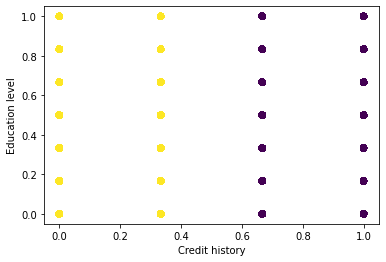

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df5['Credit history'], df5['Education level'], c=df5['Cluster'])
plt.xlabel('Credit history')
plt.ylabel('Education level')
plt.show()

#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfdbscan = df5

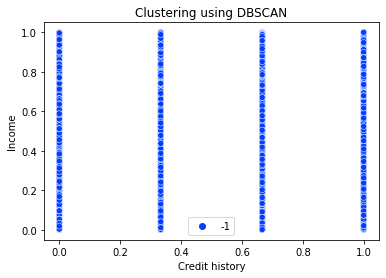

In [ ]:
dfdbscan = df5[['Credit history', 'Income', 'Employment history', 'Loan amount', 
        'Collateral', 'Debt-to-income ratio', 'Geographic location', 
        'Age', 'Education level']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfdbscan)

# Perform clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Visualize the clustering result
sns.scatterplot(x=dfdbscan['Credit history'], y=dfdbscan['Income'], hue=clusters, palette='bright')
plt.title('Clustering using DBSCAN')
plt.show()


#### Hierarcical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
# Select features
X = df[['Credit history', 'Income', 'Employment history', 'Loan amount', 
        'Collateral', 'Debt-to-income ratio', 'Geographic location', 
        'Age', 'Education level']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Neural Network

### Performa Model

### TUNNING

### Saran Evaluasi Model

### Semi Deployment

### Flask Deployment

## ARSIP

In [ ]:
# Inisialisasi Faker
fake = Faker()

# Membuat data dummy
data = {'Credit history': [fake.random_element(elements=('Good', 'Fair', 'Poor')) for _ in range(100)],
        'Income': [fake.random_int(min=2000, max=100000) for _ in range(100)],
        'Employment history': [fake.random_element(elements=('None', '1-2 years', '3-5 years', '6-10 years', '10+ years')) for _ in range(100)],
        'Loan amount': [fake.random_int(min=1000, max=50000) for _ in range(100)],
        'Collateral': [fake.random_element(elements=('None', 'Car', 'House', 'Stocks')) for _ in range(100)],
        'Debt-to-income ratio': [fake.random_int(min=10, max=50) for _ in range(100)],
        'Geographic location': [fake.random_element(elements=('Urban', 'Suburban', 'Rural')) for _ in range(100)],
        'Age': [fake.random_int(min=18, max=80) for _ in range(100)],
        'Education level': [fake.random_element(elements=('High school', 'Bachelor\'s degree', 'Master\'s degree', 'Doctoral degree')) for _ in range(100)]}


In [ ]:
# Konversi dictionary menjadi dataframe
df = pd.DataFrame(data)
df2= df

In [ ]:
# Preprocessing
# Mengubah nilai 'None' pada kolom 'Employment history' dan 'Collateral' menjadi nilai NaN
df['Employment history'] = df['Employment history'].replace('None', np.nan)
df['Collateral'] = df['Collateral'].replace('None', np.nan)

# Menghapus baris dengan nilai NaN
df = df.dropna()

# Mengubah kolom 'Income' menjadi tipe data numerik
df['Income'] = pd.to_numeric(df['Income'])

# Mengubah kolom 'Employment history' menjadi tipe data kategori
df['Employment history'] = pd.Categorical(df['Employment history'], categories=['1-2 years', '3-5 years', '6-10 years', '10+ years'], ordered=True)

# Mengubah kolom 'Collateral' menjadi tipe data kategori
df['Collateral'] = pd.Categorical(df['Collateral'], categories=['Car', 'House', 'Stocks'], ordered=True)

# Mengubah kolom 'Education level' menjadi tipe data kategori dan mengkode kategori menggunakan angka
df['Education level'] = pd.Categorical(df['Education level'], categories=['High school', 'Bachelor\'s degree', 'Master\'s degree', 'Doctoral degree'], ordered=True)
df['Education level'] = df['Education level'].cat.codes

# Mengubah kolom 'Credit history' menjadi tipe data numerik menggunakan one-hot encoding
df = pd.get_dummies(df, columns=['Credit history'], prefix='Credit history')

# Mengubah kolom 'Geographic location' menjadi tipe data numerik menggunakan label encoding
df['Geographic location'] = df['Geographic location'].replace({'Urban': 0, 'Suburban': 1, 'Rural': 2})

# Menampilkan dataframe
print(df.head())


   Income Employment history  Loan amount Collateral  Debt-to-income ratio  \
0   46622         6-10 years        32546        Car                    19   
1   92640         6-10 years        37497        Car                    29   
2   31487          10+ years        14179      House                    14   
3   48953         6-10 years        31192        Car                    30   
6   78954          3-5 years        40076     Stocks                    21   

   Geographic location  Age  Education level  Credit history_Fair  \
0                    2   77                1                    1   
1                    2   35                1                    1   
2                    2   68                3                    0   
3                    2   54                0                    0   
6                    0   62                3                    0   

   Credit history_Good  Credit history_Poor  
0                    0                    0  
1                    0  

<ipython-input-15-23aa8f17b3f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = pd.to_numeric(df['Income'])
<ipython-input-15-23aa8f17b3f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Employment history'] = pd.Categorical(df['Employment history'], categories=['1-2 years', '3-5 years', '6-10 years', '10+ years'], ordered=True)
<ipython-input-15-23aa8f17b3f9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

   Income Employment history  Loan amount Collateral  Debt-to-income ratio  \
0   46622         6-10 years        32546        Car                    19   
1   92640         6-10 years        37497        Car                    29   
2   31487          10+ years        14179      House                    14   
3   48953         6-10 years        31192        Car                    30   
6   78954          3-5 years        40076     Stocks                    21   

   Geographic location  Age  Education level  Credit history_Fair  \
0                    2   77                1                    1   
1                    2   35                1                    1   
2                    2   68                3                    0   
3                    2   54                0                    0   
6                    0   62                3                    0   

   Credit history_Good  Credit history_Poor  
0                    0                    0  
1                    0  

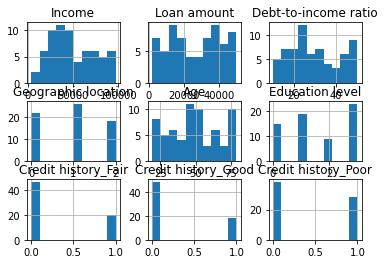

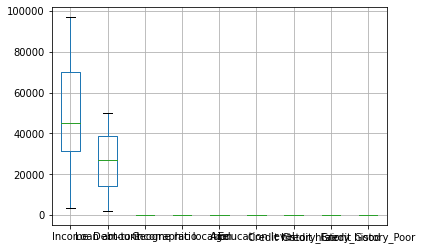

In [ ]:
# Menampilkan 5 baris pertama dari data
print(df.head())

# Menampilkan deskripsi statistik dari data
print(df.describe())

# Menampilkan jumlah data unik pada setiap kolom
print(df.nunique())

# Menampilkan korelasi antar kolom
print(df.corr())

# Menampilkan distribusi data pada setiap kolom
import matplotlib.pyplot as plt
df.hist()
plt.show()

# Menampilkan boxplot untuk setiap kolom numerik
df.boxplot()
plt.show()


In [ ]:
# preprocessing

# one-hot encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=['collateral', 'geographic_location', 'education_level'])

# normalization
data_norm = (data_encoded - data_encoded.mean()) / data_encoded.std()

# show normalized data
print(data_norm)

KeyError: ignored